In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [2]:
import os

bio_path = "Data/api_data_aadhar_biometric/"
bio_files = [bio_path + f for f in os.listdir(bio_path)]

bio_df = pd.concat([pd.read_csv(f) for f in bio_files], ignore_index=True)

bio_df.shape


(1861108, 6)

In [3]:
demo_path = "Data/api_data_aadhar_demographic/"
demo_files = [demo_path + f for f in os.listdir(demo_path)]

demo_df = pd.concat([pd.read_csv(f) for f in demo_files], ignore_index=True)

demo_df.shape


(2071700, 6)

In [4]:
enrol_path = "Data/api_data_aadhar_enrolment/"
enrol_files = [enrol_path + f for f in os.listdir(enrol_path)]

enrol_df = pd.concat([pd.read_csv(f) for f in enrol_files], ignore_index=True)

enrol_df.shape


(1006029, 7)

In [5]:
bio_df.columns
demo_df.columns
enrol_df.columns


Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [6]:
bio_df.head()
demo_df.head()
enrol_df.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [7]:
bio_df.columns = bio_df.columns.str.lower()
demo_df.columns = demo_df.columns.str.lower()
enrol_df.columns = enrol_df.columns.str.lower()


In [8]:
bio_df = bio_df.rename(columns={
    "age_0_5": "children_0_5",
    "age_5_17": "children_5_17",
    "age_18_greater": "adults_18_plus"
})

demo_df = demo_df.rename(columns={
    "age_0_5": "children_0_5",
    "age_5_17": "children_5_17",
    "age_18_greater": "adults_18_plus"
})

enrol_df = enrol_df.rename(columns={
    "age_0_5": "children_0_5",
    "age_5_17": "children_5_17",
    "age_18_greater": "adults_18_plus"
})


In [9]:
bio_df["date"] = pd.to_datetime(bio_df["date"], dayfirst=True)
demo_df["date"] = pd.to_datetime(demo_df["date"], dayfirst=True)
enrol_df["date"] = pd.to_datetime(enrol_df["date"], dayfirst=True)


In [10]:
print(bio_df.columns.tolist())


['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']


In [11]:
bio_df.rename(columns={
    "age_0_5": "children_0_5",
    "age_5_17": "children_5_17",
    "age_18_greater": "adults_18_plus"
}, inplace=True)

demo_df.rename(columns={
    "age_0_5": "children_0_5",
    "age_5_17": "children_5_17",
    "age_18_greater": "adults_18_plus"
}, inplace=True)

enrol_df.rename(columns={
    "age_0_5": "children_0_5",
    "age_5_17": "children_5_17",
    "age_18_greater": "adults_18_plus"
}, inplace=True)


In [12]:
print(bio_df.columns.tolist())


['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']


In [13]:
for col in bio_df.columns:
    print(col)


date
state
district
pincode
bio_age_5_17
bio_age_17_


In [14]:
bio_df.rename(columns={
    "bio_age_5_17": "children_5_17",
    "bio_age_17_": "adults_18_plus"
}, inplace=True)


In [15]:
print(bio_df.columns.tolist())


['date', 'state', 'district', 'pincode', 'children_5_17', 'adults_18_plus']


In [16]:
bio_state = (
    bio_df
    .groupby("state")[["children_5_17", "adults_18_plus"]]
    .sum()
    .reset_index()
)

bio_state.head()


,state,children_5_17,adults_18_plus
0,Andaman & Nicobar Islands,405,1979
1,Andaman and Nicobar Islands,11401,6913
2,Andhra Pradesh,2241448,1473144
3,Arunachal Pradesh,42894,29500
4,Assam,596624,386098


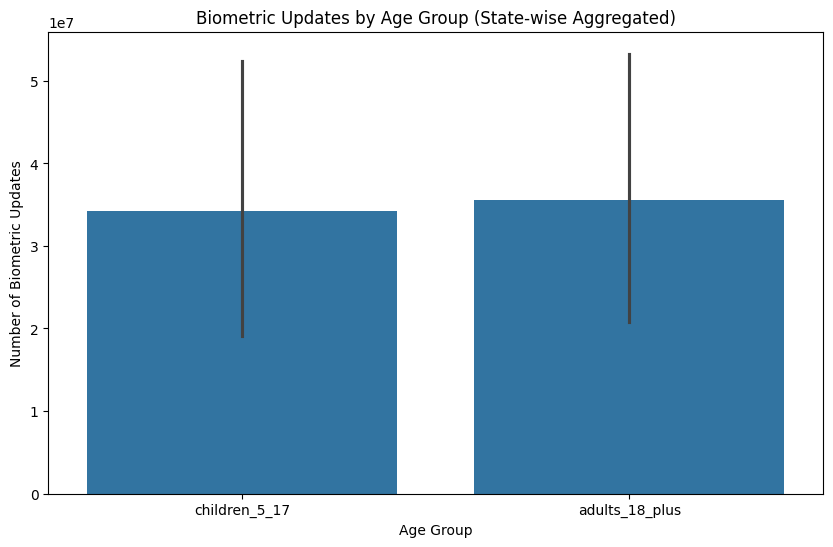

In [17]:
bio_state_melt = bio_state.melt(
    id_vars="state",
    value_vars=["children_5_17", "adults_18_plus"],
    var_name="age_group",
    value_name="biometric_updates"
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=bio_state_melt,
    x="age_group",
    y="biometric_updates",
    estimator=sum
)
plt.title("Biometric Updates by Age Group (State-wise Aggregated)")
plt.xlabel("Age Group")
plt.ylabel("Number of Biometric Updates")
plt.show()


In [18]:
plt.savefig(
    "charts/biometric_updates_age_group.png",
    dpi=300,
    bbox_inches="tight"
)


<Figure size 640x480 with 0 Axes>

In [19]:
print(demo_df.columns.tolist())


['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']


In [20]:
demo_df.rename(columns={
    "demo_age_5_17": "children_5_17",
    "demo_age_18_": "adults_18_plus"
}, inplace=True)


In [21]:
demo_df.columns


Index(['date', 'state', 'district', 'pincode', 'children_5_17',
       'demo_age_17_'],
      dtype='object')

In [22]:
for col in demo_df.columns:
    print(col)


date
state
district
pincode
children_5_17
demo_age_17_


In [23]:
demo_df.rename(columns={
    "demo_age_5_17": "children_5_17",
    "demo_age_17_": "adults_18_plus"
}, inplace=True)


In [24]:
print(demo_df.columns.tolist())


['date', 'state', 'district', 'pincode', 'children_5_17', 'adults_18_plus']


In [25]:
demo_state = (
    demo_df
    .groupby("state")[["children_5_17", "adults_18_plus"]]
    .sum()
    .reset_index()
)

demo_state.head()


,state,children_5_17,adults_18_plus
0,100000,0,2
1,Andaman & Nicobar Islands,13,1046
2,Andaman and Nicobar Islands,604,5583
3,Andhra Pradesh,321143,1974362
4,Arunachal Pradesh,5783,30660


In [26]:
demo_state.to_csv("charts/address_updates_statewise.csv", index=False)


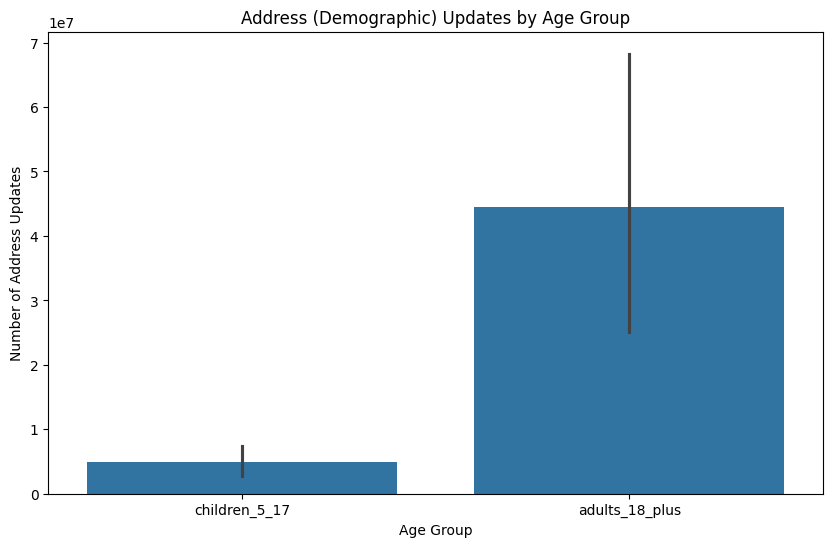

In [27]:
demo_state_melt = demo_state.melt(
    id_vars="state",
    value_vars=["children_5_17", "adults_18_plus"],
    var_name="age_group",
    value_name="address_updates"
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=demo_state_melt,
    x="age_group",
    y="address_updates",
    estimator=sum
)
plt.title("Address (Demographic) Updates by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Address Updates")
plt.show()


In [28]:
plt.savefig(
    "charts/address_updates_age_group.png",
    dpi=300,
    bbox_inches="tight"
)


<Figure size 640x480 with 0 Axes>